In [7]:
import os, sys
import time
import datetime
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt 
import random


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse, Circle

ROOTDIR = os.path.abspath(os.path.realpath('./')) + '/Py'

sys.path.append(os.path.join(ROOTDIR, ''))

import geopandas as gp
import shapely



In [59]:
'''Basic Path'''

Daily_path='./Data/Daily_Feature/'

Load_path='./Data/Processed/'

CMMDP_path='./Data/CMMDP/'

date_str='2019-11-01'


step_1=30


step_2=108


prob_=0.5

'''Geometry_dic'''

Geometry_dic=np.load(os.path.join(Load_path,'Geometry_dic.npy')).item()

'''Location list'''

Location_list=np.load(os.path.join(Load_path,'Location_list.npy'))


def Compute_Delta(threhold,O_num):
    denominator=np.log(1/(1-threhold))
    return int(O_num/denominator)


In [60]:
'''Order Features'''


Request_data=pd.read_csv(os.path.join(Daily_path,'Request_data'+date_str+'.csv'))

Request_data=Request_data.drop(columns=['Unnamed: 0'])

Request_stat=Request_data.groupby(['Pickup_Location','Pickup_step']).count()[['Order_id']]

Request_stat['Transition']=Request_stat.index

Request_stat['Location_id']=Request_stat.apply(lambda x:x['Transition'][0],axis=1)

Request_stat['step']=Request_stat.apply(lambda x:x['Transition'][1],axis=1)

Request_stat=Request_stat.reset_index(drop=True)

Request_stat=Request_stat.rename(index=str, columns={"Order_id": "Order_Sum"})

Request_stat=Request_stat[['Location_id','step','Order_Sum']]

Request_stat


'''Driver Features'''

Driver_data=pd.read_csv(os.path.join(CMMDP_path,'Driver_data'+date_str+'.csv'))

Driver_data=Driver_data.drop(columns=['Unnamed: 0'])

Driver_stat=Driver_data.groupby(['Location_id','step']).count()[['Driver_id']]

Driver_stat['Transition']=Driver_stat.index

Driver_stat['Location_id']=Driver_stat.apply(lambda x:x['Transition'][0],axis=1)

Driver_stat['step']=Driver_stat.apply(lambda x:x['Transition'][1],axis=1)

Driver_stat=Driver_stat.reset_index(drop=True)

Driver_stat=Driver_stat.rename(index=str, columns={"Driver_id": "Driver_Sum"})

Driver_stat=Driver_stat[['Location_id','step','Driver_Sum']]


'''Temp'''

Pick_stat=Driver_data.loc[Driver_data['Order_id']!=-1]

Pick_stat=Pick_stat.groupby(['Location_id','step']).count()[['Driver_id']]

Pick_stat['Transition']=Pick_stat.index

Pick_stat['Location_id']=Pick_stat.apply(lambda x:x['Transition'][0],axis=1)

Pick_stat['step']=Pick_stat.apply(lambda x:x['Transition'][1],axis=1)

Pick_stat=Pick_stat.reset_index(drop=True)

Pick_stat=Pick_stat.rename(index=str, columns={"Driver_id": "Pick_Sum"})

Pick_stat=Pick_stat[['Location_id','step','Pick_Sum']]

'''Merge'''


Driver_stat=Driver_stat.merge(Pick_stat,on=['Location_id','step'],how='left')

Driver_stat=Driver_stat.fillna(0.0)

Driver_stat['match_prob']=Driver_stat.apply(lambda x:round(x['Pick_Sum']/x['Driver_Sum'],2),axis=1)

Driver_stat

'''Overall'''


Overall_stat=Driver_stat.merge(Request_stat,on=['Location_id','step'],how='left')

Overall_stat=Overall_stat.fillna(0.0)

Overall_stat['ratio']=Overall_stat.apply(lambda x:x['Order_Sum']/x['Driver_Sum'],axis=1)

Overall_stat=Overall_stat[['Location_id','step','Pick_Sum','Driver_Sum','Order_Sum','match_prob','ratio']]

Overall_stat






,Location_id,step,Pick_Sum,Driver_Sum,Order_Sum,match_prob,ratio
0,4,0,8.0,53,9.0,0.15,0.169811
1,4,1,9.0,33,11.0,0.27,0.333333
2,4,2,6.0,24,8.0,0.25,0.333333
3,4,3,4.0,18,5.0,0.22,0.277778
4,4,4,6.0,16,8.0,0.38,0.500000
5,4,5,11.0,28,14.0,0.39,0.500000
6,4,6,10.0,36,12.0,0.28,0.333333
7,4,7,2.0,19,3.0,0.11,0.157895
8,4,8,2.0,23,3.0,0.09,0.130435
9,4,9,5.0,19,6.0,0.26,0.315789


In [74]:
'''Fleet Size'''

Base_size={}
Required_size={}
for step in range(End_step):
    Step_stat=Overall_stat.loc[Overall_stat['step']==step]
    Step_stat['Required_num']=Step_stat.apply(lambda x:Compute_Delta(prob_,x['Order_Sum']),axis=1)
    Base_size[step]=Step_stat['Driver_Sum'].sum()
    Required_size[step]=Step_stat['Required_num'].sum()
    

    
    

/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


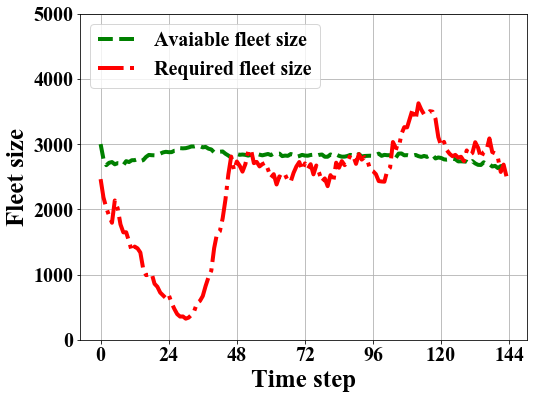

In [88]:
'''Figure'''

figsize = 8,6

font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 20}

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

l1=ax1.plot(Base_size.keys(), Base_size.values(),'g--',linewidth=4,label='Avaiable fleet size')

l2=ax1.plot(Required_size.keys(), Required_size.values(),'r-.',linewidth=4,label='Required fleet size')

ax1.set_ylabel('Fleet size',font_label)

ax1.set_xlabel('Time step',font_label)

ax1.legend(loc = 'upper left',prop=font_legend)

xmajorLocator   = MultipleLocator(24)

ax1.xaxis.set_major_locator(xmajorLocator) 

ax1.set_ylim([0,5000])

plt.grid()

plt.show()

# Step 1

/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


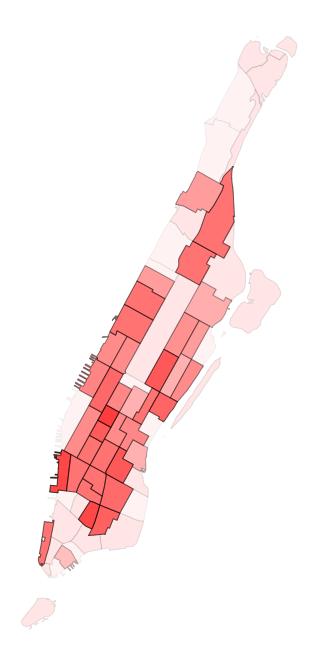

In [66]:
Step1_stat=Overall_stat.loc[Overall_stat['step']==step_1]

Step1_stat['Required_num']=Step1_stat.apply(lambda x:Compute_Delta(prob_,x['Order_Sum']),axis=1)



'''Plot the initialized coordinates of drivers'''

figsize = 8,12

fig,ax = plt.subplots(figsize=figsize)

Match_prob_dic={}
for idx,row in Step1_stat.iterrows():
    
    Match_prob_dic[row['Location_id']]=row['match_prob']+0.05



for loc in Location_list:
    
    if loc in Match_prob_dic.keys():
    
        geometry=gp.GeoSeries(Geometry_dic[loc])

        geometry.plot(ax=ax,alpha=Match_prob_dic[loc],color='r',edgecolor='black')
        
    else:
        
        geometry=gp.GeoSeries(Geometry_dic[loc])

        geometry.plot(ax=ax,alpha=0.1,color='r',edgecolor='black')
        
        
        

    
'''Turn off the axis'''
plt.xticks([])  
plt.yticks([])  
plt.axis('off')  


plt.show()  
    



# Step 2

/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


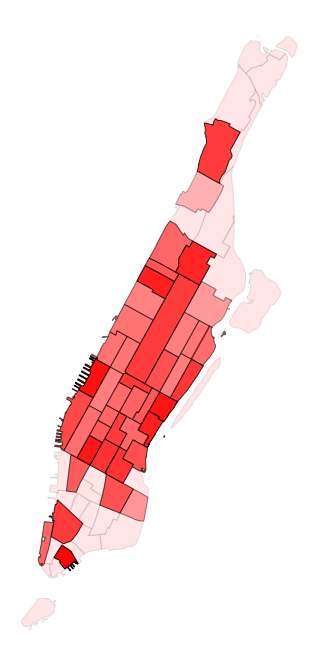

In [67]:
Step2_stat=Overall_stat.loc[Overall_stat['step']==step_2]

Step2_stat['Required_num']=Step2_stat.apply(lambda x:Compute_Delta(prob_,x['Order_Sum']),axis=1)



'''Plot the initialized coordinates of drivers'''

figsize = 8,12

fig,ax = plt.subplots(figsize=figsize)

Match_prob_dic={}
for idx,row in Step2_stat.iterrows():
    
    Match_prob_dic[row['Location_id']]=row['match_prob']+0.1



for loc in Location_list:
    
    if loc in Match_prob_dic.keys():
    
        geometry=gp.GeoSeries(Geometry_dic[loc])

        geometry.plot(ax=ax,alpha=Match_prob_dic[loc],color='r',edgecolor='black')
        
    else:
        
        geometry=gp.GeoSeries(Geometry_dic[loc])

        geometry.plot(ax=ax,alpha=0.1,color='r',edgecolor='black')
        
        
        

    
'''Turn off the axis'''
plt.xticks([])  
plt.yticks([])  
plt.axis('off')  


plt.show()  
    

